In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\Real Estate Price Prediction\dataset\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.groupby("area_type").count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [4]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [16]:
df[]

4.625

In [4]:
df2=df.drop(["area_type","availability","society","balcony"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()
df2=df2.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
df2["bhk"]=df2["size"].apply(lambda x:int(x.split(" ")[0]))

In [7]:
df2.head()
df2[df2["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [8]:
df["total_sqft"].unique()
def mean_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3=df2[~df2["total_sqft"].apply(mean_float)]
df3.head()


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [9]:

def make_avg(x):
    sstring=x.split("-")
    if len(sstring)==2:
        return (float(sstring[0])+float(sstring[1]))/2
    try:
        return float(x)
    except:
        return None
    
 

In [10]:
df4=df2.copy()
df4["total_sqft"]=df4["total_sqft"].apply(make_avg)
df4.loc[30]



location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [11]:
df5=df4.copy()


In [12]:
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5["location"]=df5["location"].astype(str)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
location          13246 non-null object
size              13246 non-null object
total_sqft        13200 non-null float64
bath              13246 non-null float64
price             13246 non-null float64
bhk               13246 non-null int64
price_per_sqft    13200 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [13]:
df5.location=df5.location.apply(lambda x:x.strip())
loc_stat=df5.groupby("location")["location"].count().sort_values(ascending=False)
loc_stat


location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [14]:
len(loc_stat[loc_stat<=10])
view_loc_less_than_10=loc_stat[loc_stat<=10]
view_loc_less_than_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [15]:
df5.location=df5.location.apply(lambda x:"others"if x in view_loc_less_than_10 else x)

In [5]:
len(df5["location"].unique())

NameError: name 'df5' is not defined

In [17]:
 df5[df5["total_sqft"]/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.00,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.00,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.00,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.00,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.00,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.00,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.00,7,12105.263158
149,others,6 Bedroom,1034.0,5.0,185.00,6,17891.682785


In [18]:
 df6=df5[~(df5["total_sqft"]/df5.bhk<300)]

In [19]:
df6.price_per_sqft.describe()
df6.shape

(12502, 7)

In [20]:
def remove_pps(dframe):
    df_out=pd.DataFrame()
    for key,subdf in dframe.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) &(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps(df6)

In [21]:
df7.shape

(10241, 7)

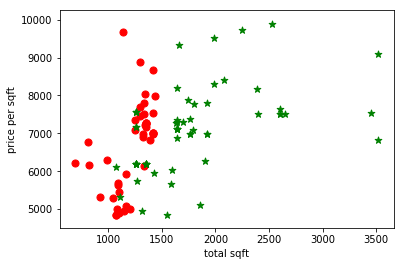

In [22]:
def plot_scatter(df,loca):
    bhk2=df7[(df7.location==loca)& (df7.bhk==2)]
    bhk3=df7[(df7.location==loca)& (df7.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="red",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker="*",color="green",s=50)
    plt.xlabel("total sqft")
    plt.ylabel("price per sqft")
plot_scatter(df7,"Hebbal")
    

In [23]:
def remove_out(df):
    ei=np.array([])
    for loc,loc_df in df.groupby("location"):
        bhk_stat={}
        for bhk,bhk_df in loc_df.groupby("bhk"):
            bhk_stat[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby("bhk"):
            stat=bhk_stat.get(bhk-1)
            if stat and stat["count"]>5:
                ei=np.append(ei,bhk_df[bhk_df.price_per_sqft<(stat["mean"])].index.values)
    return df.drop(ei,axis="index")
                         
df8=remove_out(df7)
df8.shape                         

(7329, 7)

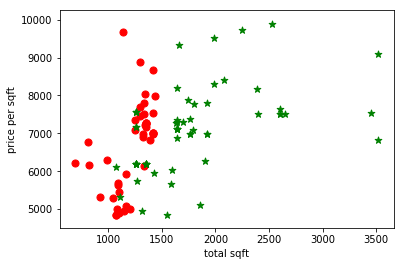

In [24]:
plot_scatter(df8,"Hebbal")

(array([ 548., 3591., 2300.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <a list of 10 Patch objects>)

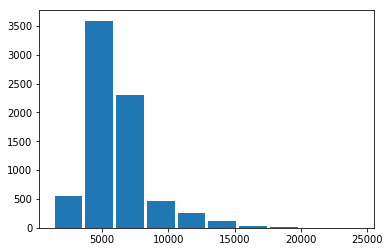

In [25]:
plt.hist(df8.price_per_sqft,rwidth=0.9)

In [26]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [27]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [28]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<H2>MODELLING<H2>

In [36]:
dummies=pd.get_dummies(df10["location"])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df11= pd.concat([df10,dummies.drop("others",axis="columns")],axis="columns")

In [38]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df11.drop("location",axis="columns",inplace=True)

In [41]:
x=df11.drop("price",axis=1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y=df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8452277697874342

In [47]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [49]:
import pickle
with open("house_model.pickle","wb") as f:
    pickle.dump(model,f)

In [55]:
import json
columns={"data_columns":[col.lower() for col in x.columns]
        }
with open("columns.json","w") as f:
    f.write(json.dumps(columns))